In [614]:
from modules.data_modify import *

In [615]:
from modules.load import *
from modules.lstm import *
sns.set()
from tensorflow.keras.models import load_model

In [620]:
#学習用データ
df_dan = load("dan_5V1.csv")
df_table = load("table_5V1.csv")
df_puti = load("puti_5V1.csv")
df_gam = load("gam_5V1.csv")
df_magic = load("magic_5V1.csv")
df_denim = load("denim_5V1.csv")
df_plus = load("plus_5V1.csv")
df_sponge = load("sponge_5V1.csv")
df_finger = load("yubi_5V1.csv")
df_kiban = load("kiban_5V1.csv")

In [617]:
#学習用データ
df_dan = load("dan_5V2.csv")
df_table = load("table_5V2.csv")
df_puti = load("puti_5V2.csv")
df_gam = load("gam_5V2.csv")
df_magic = load("magic_5V2.csv")
df_denim = load("denim_5V2.csv")
df_plus = load("plus_5V2.csv")
df_sponge = load("sponge_5V2.csv")
df_finger = load("yubi_5V2.csv")
df_kiban = load("kiban_5V2.csv")

In [618]:
#学習用データ
df_dan = load("dan_5V3.csv")
df_table = load("table_5V3.csv")
df_puti = load("puti_5V3.csv")
df_gam = load("gam_5V3.csv")
df_magic = load("magic_5V3.csv")
df_denim = load("denim_5V3.csv")
df_plus = load("plus_5V3.csv")
df_sponge = load("sponge_5V3.csv")
df_finger = load("yubi_5V3.csv")
df_kiban = load("kiban_5V3.csv")

In [621]:
x=df_kiban.iloc[:, 0]-df_kiban.iloc[0,0]
xx =np.linspace(0, 45, 1000)

In [622]:
u = df_kiban.iloc[:, 1]

In [623]:
spl = UnivariateSpline(xx, u, s=0, k=2)

In [624]:
 y_data_smooth = spl(xx)

In [625]:
y_data_smooth

array([3.75, 3.76, 3.76, 3.76, 3.77, 3.77, 3.77, 3.77, 3.77, 3.77, 3.75,
       3.75, 3.75, 3.75, 3.75, 3.75, 3.76, 3.76, 3.76, 3.76, 3.76, 3.74,
       3.75, 3.75, 3.75, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.77, 3.77,
       3.77, 3.77, 3.75, 3.75, 3.75, 3.76, 3.76, 3.77, 3.76, 3.77, 3.77,
       3.77, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.76, 3.76,
       3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75,
       3.76, 3.76, 3.75, 3.75, 3.76, 3.76, 3.76, 3.76, 3.77, 3.77, 3.77,
       3.77, 3.77, 3.77, 3.76, 3.76, 3.76, 3.75, 3.75, 3.77, 3.77, 3.77,
       3.77, 3.77, 3.77, 3.76, 3.76, 3.76, 3.77, 3.77, 3.77, 3.77, 3.77,
       3.77, 3.77, 3.77, 3.77, 3.76, 3.76, 3.76, 3.76, 3.77, 3.77, 3.77,
       3.77, 3.77, 3.77, 3.78, 3.78, 3.77, 3.78, 3.77, 3.76, 3.75, 3.75,
       3.76, 3.76, 3.78, 3.78, 3.79, 3.78, 3.79, 3.78, 3.77, 3.76, 3.76,
       3.76, 3.76, 3.77, 3.77, 3.78, 3.78, 3.78, 3.78, 3.78, 3.78, 3.77,
       3.77, 3.76, 3.76, 3.77, 3.77, 3.78, 3.78, 3.

In [626]:
#minに関してはmin(x_data)とすることでデータの最小の秒数にすることが出来る。　maxも同様
def smoothings_from_pd(df, min=0, max=50, rate=1000, font=True):
    x_data = df.iloc[:, 0]
    x_data  = x_data-x_data[0]
    y_data = df.iloc[:, 1]

    # np.linspace(データの最小値, データの最大値, サンプリングレート)
    x_data_smooth = np.linspace(min, max, rate)

    fig, ax = plt.subplots(1, 1)

    # 平滑化スプラインの次数k =>今回は二次元であるため2
    spl = UnivariateSpline(x_data, y_data, s=0, k=2)
    y_data_smooth = spl(x_data_smooth)

    if font == True:
#         ax.plot(x_data_smooth, y_data_smooth, 'b', label="resample")
        ax.plot(x_data, y_data, "red", label="original")
        plt.legend(bbox_to_anchor=(1, 1), loc='upper right')

    elif font == False:
        ax.plot(x_data_smooth, y_data_smooth, 'b')
#         ax.plot(x_data, y_data, "red")
        plt.legend(bbox_to_anchor=(1, 1), loc='upper right')

    flg = plt.xlim(35, 47)
    flg = plt.ylim(3.3, 4.0)
    flg = plt.show()

    #x_datasmoothに関しては(0,49)のデータでどれも等しいので無くても良い
    return x_data_smooth, y_data_smooth

In [604]:
# テーブル, 椅子, デニム, ダンボール, ペットボトル, 指, マジックテープ, スポンジ, ガムテープ, タオル の順番でセット
# データセットを作成する
def set_dict(df_list,
            data_col=["cardboard", "table", "puti", "gamtape", "magic","denim","plustic","sponge","finger","kiban"]):
    datas = []
    logs = []
    means = []
    moves = []
    diffs = []
    for i in df_list:
        x, y = smoothings_from_pd(i,min=0,max=45,font=False)
        z = np.log(y)
        zz = pd.DataFrame(y).rolling(window=20).mean()
        zzz = pd.DataFrame(y)-zz
        zzzz = pd.DataFrame(y).diff()
        zz = np.array(zz).astype("float32")
        zzz = np.array(zzz).astype("float32")
        zzzz = np.array(zzzz).astype("float32")
        datas.append(y)
        logs.append(z)
        means.append(zz)
        moves.append(zzz)
        diffs.append(zzzz)

    #ディクショナリー型のデータセットを作製　key:value = label:wave
    df_dict = dict(zip(data_col, datas))
    df_dict_logs = dict(zip(data_col, logs))
    df_dict_means = dict(zip(data_col, means))
    df_dict_moves = dict(zip(data_col, moves))
    df_dict_diffs = dict(zip(data_col, diffs))
    return df_dict, df_dict_logs, df_dict_means, df_dict_moves, df_dict_diffs 

In [605]:
df_list = [df_dan,df_table,df_puti,df_gam,df_magic,df_denim,df_plus,df_sponge,df_finger,df_kiban]

No handles with labels found to put in legend.


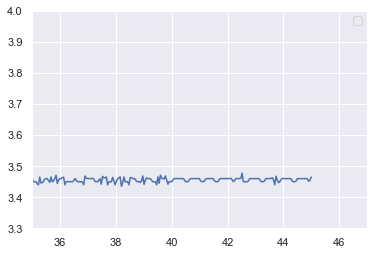

No handles with labels found to put in legend.


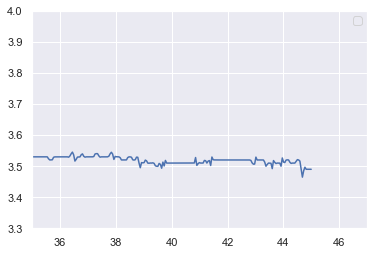

No handles with labels found to put in legend.


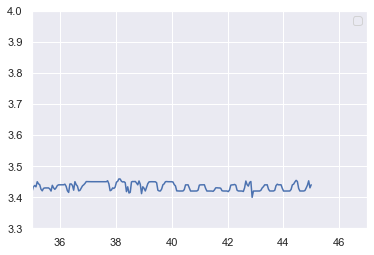

No handles with labels found to put in legend.


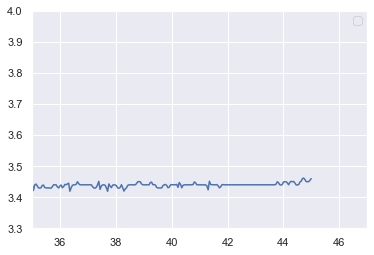

No handles with labels found to put in legend.


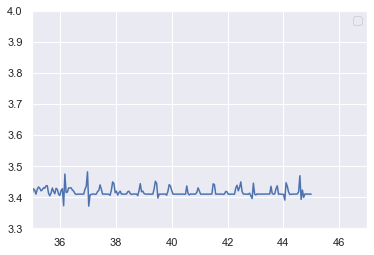

No handles with labels found to put in legend.


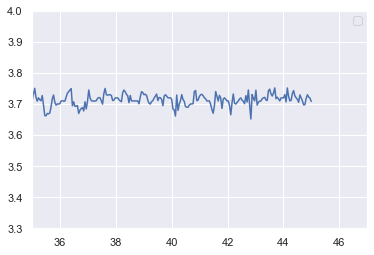

No handles with labels found to put in legend.


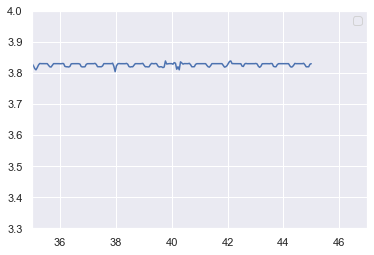

No handles with labels found to put in legend.


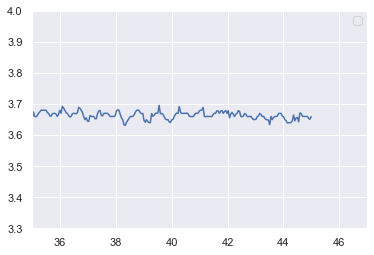

No handles with labels found to put in legend.


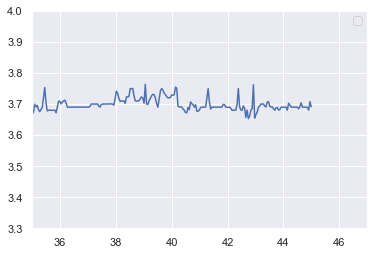

No handles with labels found to put in legend.


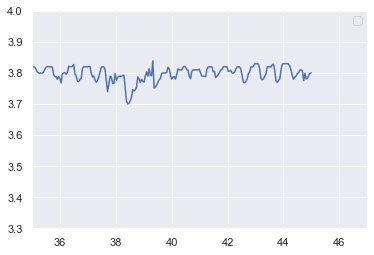

In [606]:
df_dict, df_dict_logs, df_dict_means, df_dict_moves, df_dict_diffs  = set_dict(df_list)

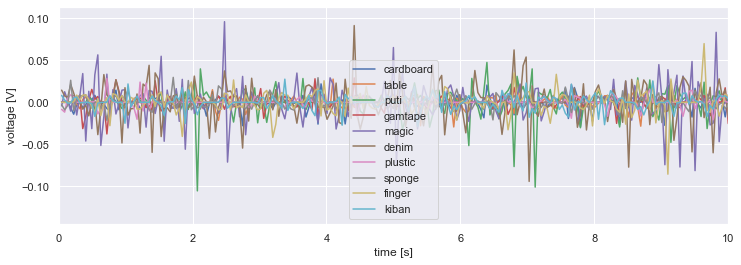

In [607]:
x=np.linspace(0,45,1000)
show_concat(x,df_dict_diffs)

# 標準化

In [608]:
# ③データの標準化の一括
class _Standard:

    # dictをインスタンスとして定義
    def __init__(self, df_dict, df_dict_moves, df_dict_diffs):
        self.df_dict = df_dict
        self.df_dict_moves = df_dict_moves
        self.df_dict_diffs = df_dict_diffs

        self.data_col = ["cardboard", "table", "puti", "gamtape", "magic","denim","plustic","sponge","finger","kiban"]
    # データの標準化の一括 1:一般 2:移動平均 3:階差
    def standard_one(self, select: int, created_list=[]):

        if select == 1:
            for i in self.df_dict:
                y = np.array(df_dict[i]).reshape(-1, 1)
                y = scale(y)
                a, y = np.array(y)
                y = np.array(y)
                created_list.append(y)

        elif select == 2:
            for i in self.df_dict_moves:
                y = np.array(df_dict[i]).reshape(-1, 1)
                y = scale(y)
                a, y = np.array(y)
                y = np.array(y)
                created_list.append(y)

        elif select == 3:
            for i in self.df_dict_diffs:
                y = np.array(df_dict[i]).reshape(-1, 1)
                y = scale(y)
                a, y = np.array(y)
                y = np.array(y)
                created_list.append(y)

        df_dict_std = dict(zip(self.data_col, created_list))
        return df_dict_std

    # 一括して標準化
    def standard_all(self, created_list=[]):
        df_con = [self.df_dict, self.df_dict_moves, self.df_dict_diffs]
        dic_list = []

        for i in df_con:
            for j in i:
                y = np.array(i[j]).reshape(-1, 1)
                y = scale(y)
                a, y = np.array(y)
                y = np.array(y)
                created_list.append(y)
            df_dict_std = dict(zip(self.data_col, created_list))
            dic_list.append(df_dict_std)
            #created_listを初期化
            created_list =[]

        return dic_list

In [609]:
st = _Standard(df_dict, df_dict_moves, df_dict_diffs)

In [610]:
df_dict_std =st.standard_one(1)

In [611]:
dd = st.standard_all()

In [612]:
dd[0] = df_dict_std

In [613]:
for i in dd:
    for j in i:
        print(i[j].shape)

(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


# データセットの作成

In [542]:
# standardデータを渡す df_dict_stdとか
class _CreateDataset(_Standard):
    #名前をラベルにしたDataSet

    def make_dataset_name(self, select:int, time_steps):
        x, y, z = [], [], []
        h = 0

        #selectの値によって分岐
        if select == 0:
            df_dict = self.df_dict
        elif select == 1:
            df_dict = self.df_dict_moves
        elif select == 2:
            df_dict = self.df_dict_diffs

        for i in df_dict:
            data, target = [], []
            maxlen = time_steps

            for j in range(len(df_dict[i])-maxlen):
                data.append(df_dict[i][j:j + maxlen])
                target.append(i)

            re_data = np.array(data).reshape(len(data), maxlen, 1)
            re_target = np.array(target).reshape(len(data), 1)
            csv_data = np.array(data).reshape(len(data), maxlen)
            csv_data = pd.DataFrame(csv_data)
            csv_data["LABEL"] = re_target
            h += 1
            x.append(re_data)
            y.append(re_target)
            z.append(csv_data)

        return x, y, z


    #ラベルを数値にしたDataSet

    def make_dataset(self, select: int, time_steps):
        x, y, z = [], [], []
        h = 0

        #selectの値によって分岐
        if select == 0:
            df_dict = self.df_dict
        elif select == 1:
            df_dict = self.df_dict_moves
        elif select == 2:
            df_dict = self.df_dict_diffs

        for i in df_dict:
            data, target = [], []
            maxlen = time_steps

            for j in range(len(df_dict[i])-maxlen):
                data.append(df_dict[i][j:j + maxlen])
                target.append(h)

            re_data = np.array(data).reshape(len(data), maxlen, 1)
            re_target = np.array(target).reshape(len(data), 1)
            csv_data = np.array(data).reshape(len(data), maxlen)
            csv_data = pd.DataFrame(csv_data)
            csv_data["LABEL"] = re_target
            h += 1
            x.append(re_data)
            y.append(re_target)
            z.append(csv_data)

        return x, y, z


    #ラベルを数値にしたDataSet ストライド付き

    def make_dataset_stride(self, select: int, time_steps, stride):
        x, y, z = [], [], []
        h = 0

        #selectの値によって分岐
        if select == 0:
            df_dict = self.df_dict
        elif select == 1:
            df_dict = self.df_dict_moves
        elif select == 2:
            df_dict = self.df_dict_diffs

        for i in df_dict:
            data, target = [], []
            maxlen = time_steps

            for j in range(int((len(df_dict[i])-maxlen)/int(stride))):
                data.append(df_dict[i][j*stride:j*stride + maxlen])
                target.append(h)

            re_data = np.array(data).reshape(len(data), maxlen, 1)
            re_target = np.array(target).reshape(len(data), 1)
            csv_data = np.array(data).reshape(len(data), maxlen)
            csv_data = pd.DataFrame(csv_data)
            csv_data["LABEL"] = re_target
            h += 1
            x.append(re_data)
            y.append(re_target)
            z.append(csv_data)

        return x, y, z

    def make_dataset_stride_std(self, select: int, time_steps,  stride):
        x, y, z = [], [], []
        h = 0

        #selectの値によって分岐
        if select == 0:
            df_dict = self.df_dict
        elif select == 1:
            df_dict = self.df_dict_moves
        elif select == 2:
            df_dict = self.df_dict_diffs

        for i in df_dict:
            data, target = [], []
            maxlen = time_steps

            for j in range(int((len(df_dict[i])-maxlen)/int(stride))):
                #時系列データ一つ分
                wave = df_dict[i][j*stride:j*stride + maxlen]
                scaler = StandardScaler()
                scaler.fit(wave)
                wave_std = scaler.transform(wave)
                data.append(wave_std)
                target.append(h)

            re_data = np.array(data).reshape(len(data), maxlen, 1)
            re_target = np.array(target).reshape(len(data), 1)
            csv_data = np.array(data).reshape(len(data), maxlen)
            csv_data = pd.DataFrame(csv_data)
            csv_data["LABEL"] = re_target
            h += 1
            x.append(re_data)
            y.append(re_target)
            z.append(csv_data)

        return x, y, z

    # pandasの形式にデータを変換
    def make_csv(self, name, dataset ,save_data=False):
        con = pd.DataFrame(index=[], columns=[])
        for i,j in enumerate(dataset):
            #save_dataをTrueにすると作製
            con=pd.concat([con,j])
            if save_data:
                j.to_csv("{}{}.csv".format(self.data_col[i],name))
        return con

    # make_csvを使わずにいきなりこっちをつかうとcontatまで行う
    def make_csv_con(self, name, dataset_list, save_data=False, drop=True):
        def make_csv(name, dataset ,save_data=False):
            con = pd.DataFrame(index=[], columns=[])
            for i,j in enumerate(dataset):
                #save_dataをTrueにすると作製
                con=pd.concat([con,j])
                if save_data:
                    j.to_csv("{}{}.csv".format(self.data_col[i],name))
            return con
        con1 = make_csv(name, dataset_list[0], save_data)
        con2 = make_csv(name, dataset_list[1], save_data)
        con3 = make_csv(name, dataset_list[2], save_data)
        # データの統合 con3に関しては最後にLABELのカラムを残すためilocしない
        cons = pd.concat(
            [con1.iloc[:, :-1], con2.iloc[:, :-1], con3], axis=1)

        if drop == True:
            drop_n = sum(
                [True for idx, row in cons.iterrows() if any(row.isnull())])
            cons = cons.dropna()
            print("{}件Nanデータが有ったため削除しました".format(drop_n))
        else:
            pass
        return cons

    # データセットの形状変更 -> (sample, step, feature)
    def make_data(self,concat):
        colms = concat.shape[1]-1
        step = int(colms/3)
        ex1 = concat.iloc[:,0:step]
        ex2 = concat.iloc[:,step:step*2]
        ex3 = concat.iloc[:,step*2:step*3]
        ex1 = np.array(ex1).reshape(-1,step,1)
        ex2 = np.array(ex2).reshape(-1,step,1)
        ex3 = np.array(ex3).reshape(-1,step,1)
        fin = np.concatenate([ex1,ex2,ex3], axis=2)
        label = concat.iloc[:,-1]
        label = np.array(label)
        label = label.reshape(-1,1)
        label =one_hot(label)

        return fin,ex1,ex2,ex3,label

    def _check(self,concat,check_rand = 5,check_col="finger"):
        plt.figure(figsize=(12, 4))
        # *0.05 samplingrate=20Hzなので
        plt.plot((np.arange(0, 100))*0.05, concat[200],  label="finger")
        plt.xlim(0, 0.5)
        plt.ylim(-4, 4)
        plt.xlabel("time [s]")
        plt.ylabel("voltage [V]")
        plt.legend()
        plt.show()


In [543]:
cr = _CreateDataset(dd[0],dd[1],dd[2])

In [544]:
xx,yy,zz=cr.make_dataset_stride_std(0,100,5)
xx3,yy3,zz3=cr.make_dataset_stride(1,100,5)
xx4,yy4,zz4=cr.make_dataset_stride(2,100,5)

In [545]:
dataset_list = [zz,zz3,zz4]

cons1 = cr.make_csv_con("テストだよ",dataset_list)

cons2 = cr.make_csv_con("テストだよ",dataset_list)

In [546]:
cons3 = cr.make_csv_con("テストだよ",dataset_list)

40件Nanデータが有ったため削除しました


In [547]:
concon = pd.concat([cons1,cons2,cons3],axis=0)

In [548]:
concon.to_csv("1_14まとめ5rag.csv")

con_fin = cr.make_csv_con("テストだよ",dataset_list)

cons = pd.concat([cons1,cons2,cons3,cons4])

In [549]:
fin,ex1,ex2,ex3,label = cr.make_data(concon)

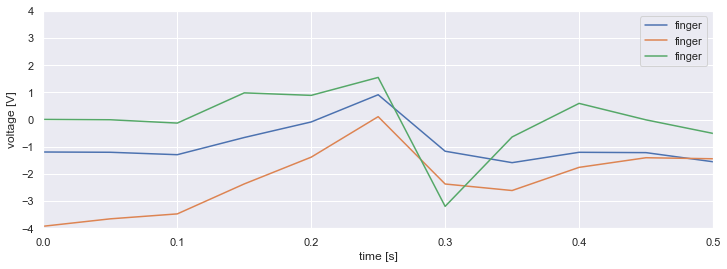

In [550]:
cr._check(fin)

In [552]:
fin.shape

(5280, 100, 3)

In [573]:
X_train, X_test, Y_train, Y_test = train_test_split(fin, label, test_size=0.33,shuffle=False)

In [574]:
label

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# deeplearningの設定

In [590]:
dee = Deeps(label_num=10)

In [591]:
# classの外に出してつかう
def cross_val_learn(x_train, y_train, n_split: int):
    kf = KFold(n_splits=n_split, shuffle=True)
    _history = []
    for train_index, val_index in kf.split(x_train, y_train):
        # モデルを更新する  ←　ここに使いたいモデルを直接入力　そうじゃないとモデルの状態が更新されない
        model = dee.lstm(X_train)
        model.compile(optimizer="adam",
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
        model.fit(x=x_train[train_index], y=y_train[train_index],
                batch_size=32, epochs=10, verbose=1)
        _history.append(model.evaluate(
            x=x_train[val_index], y=y_train[val_index], batch_size=16))
    _history = np.asarray(_history)
    loss = np.mean(_history[:, 0])
    acc = np.mean(_history[:, 1])
    print(
        f'loss: {loss} ± {np.std(_history[:, 0])} | acc: {acc} ± {np.std(_history[:, 1])}')
    return model, _history

In [592]:
model, _history = cross_val_learn(fin, label,5)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 128)               67584     
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_28 (Activation)   (None, 10)                0         
Total params: 68,874
Trainable params: 68,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
132/132 [==============================] - 5s 35ms/step - loss: 2.2160 - accuracy: 0.1695
Epoch 2/10
132/132 [==============================] - 5s 35ms/step - loss: 1.9583 - accuracy: 0.2618
Epoch 3/10
132/132 [=========================

132/132 [==============================] - 5s 35ms/step - loss: 2.2193 - accuracy: 0.1655
Epoch 2/10
132/132 [==============================] - 5s 36ms/step - loss: 1.9715 - accuracy: 0.2524
Epoch 3/10
132/132 [==============================] - 5s 36ms/step - loss: 1.7989 - accuracy: 0.3011
Epoch 4/10
132/132 [==============================] - 5s 37ms/step - loss: 1.6334 - accuracy: 0.3594
Epoch 5/10
132/132 [==============================] - 5s 35ms/step - loss: 1.4623 - accuracy: 0.4633
Epoch 6/10
132/132 [==============================] - 5s 34ms/step - loss: 1.4006 - accuracy: 0.4834
Epoch 7/10
132/132 [==============================] - 5s 37ms/step - loss: 1.1895 - accuracy: 0.5637
Epoch 8/10
132/132 [==============================] - 5s 40ms/step - loss: 1.0965 - accuracy: 0.6075
Epoch 9/10
132/132 [==============================] - 6s 42ms/step - loss: 1.0287 - accuracy: 0.6319
Epoch 10/10
66/66 [==============================] - 1s 11ms/step - loss: 0.9346 - accuracy: 0.6572
lo

In [580]:
model = dee.lstm(X_train)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 128)               67584     
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_24 (Activation)   (None, 10)                0         
Total params: 68,874
Trainable params: 68,874
Non-trainable params: 0
_________________________________________________________________


In [581]:
optimizer = RMSprop(learning_rate=0.01)
model = dee.model_compile(model,optimizer)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 128)               67584     
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_24 (Activation)   (None, 10)                0         
Total params: 68,874
Trainable params: 68,874
Non-trainable params: 0
_________________________________________________________________


In [582]:
history = dee.learn(model,X_train,Y_train,validation_split=0.1)

Epoch 1/30
25/25 [==============================] - 3s 127ms/step - loss: 2.4034 - accuracy: 0.1279 - val_loss: 2.5854 - val_accuracy: 0.0000e+00
Epoch 2/30
25/25 [==============================] - 3s 115ms/step - loss: 2.2677 - accuracy: 0.1967 - val_loss: 3.4795 - val_accuracy: 0.0395
Epoch 3/30
25/25 [==============================] - 3s 115ms/step - loss: 2.2839 - accuracy: 0.1467 - val_loss: 2.9504 - val_accuracy: 0.0254
Epoch 4/30
25/25 [==============================] - 3s 118ms/step - loss: 2.1824 - accuracy: 0.2190 - val_loss: 3.3766 - val_accuracy: 0.0000e+00
Epoch 5/30
25/25 [==============================] - 3s 115ms/step - loss: 2.0460 - accuracy: 0.2875 - val_loss: 3.5090 - val_accuracy: 0.0000e+00
Epoch 6/30
25/25 [==============================] - 3s 115ms/step - loss: 1.8209 - accuracy: 0.3506 - val_loss: 3.8235 - val_accuracy: 0.0000e+00
Epoch 7/30
25/25 [==============================] - 3s 118ms/step - loss: 1.6061 - accuracy: 0.4270 - val_loss: 3.5280 - val_accurac

In [333]:
X_train.shape

(1408, 100, 3)

In [334]:
Y_train.shape

(1408, 10)

In [593]:
dee.test(model,X_test,Y_test)

55/55 [==============================] - 1s 14ms/step - loss: 0.8469 - accuracy: 0.7034
loss: 0.8468560576438904 accuracy: 0.7033849954605103


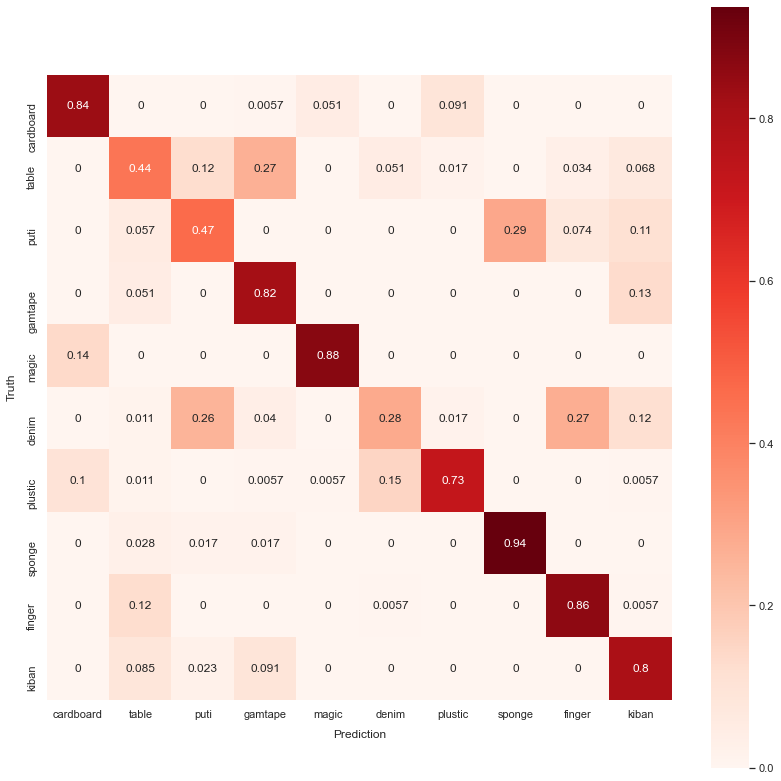

精度:0.703
適合率:0.697
再現率:0.705
f-1値:0.691


In [594]:
pred1 = model.predict(X_test)
Y_acc = np.argmax(Y_test,axis=1)
y_pred1 =np.argmax(pred1,axis=1)
Y_acc = pd.DataFrame(Y_acc)
y_pred1 = pd.DataFrame(y_pred1)
class_names = ["cardboard", "table", "puti", "gamtape", "magic","denim","plustic","sponge","finger","kiban"]
cf_matrix = confusion_matrix(Y_acc, y_pred1)
cd_df = pd.DataFrame(cf_matrix)

cd_df.columns=class_names
cd_df.index=class_names
heat = cd_df.astype('float') / cd_df.sum(axis=1)

sns.set(font_scale=1)
ax = plt.figure(figsize = (14,14))
ax = sns.heatmap(heat, annot=True,square = True,cmap='Reds')
#labelpad -> padding
ax.set_xlabel('Prediction', labelpad=10)
ax.set_ylabel('Truth', labelpad=10)
ax=plt.show()

print('精度:{:.3f}'.format(accuracy_score(Y_acc, y_pred1)))
print('適合率:{:.3f}'.format(precision_score(Y_acc, y_pred1,
                                          pos_label='positive',
                                          average='macro')))
print('再現率:{:.3f}'.format(recall_score(Y_acc, y_pred1,
                                       pos_label='positive',
                                           average='macro')))
print('f-1値:{:.3f}'.format(f1_score(Y_acc, y_pred1,
                                    pos_label='positive',
                                           average='macro')))

In [569]:
cd_df

,cardboard,table,puti,gamtape,magic,denim,plustic,sponge,finger,kiban
cardboard,89,1,5,10,3,0,5,0,0,1
table,0,63,16,6,0,0,1,0,8,7
puti,0,8,36,0,0,0,3,13,24,10
gamtape,2,33,9,65,0,0,0,0,1,0
magic,9,5,2,0,98,0,0,0,0,0
denim,0,25,53,5,0,0,1,7,14,5
plustic,4,5,32,7,2,0,33,0,0,12
sponge,0,9,6,0,0,0,0,72,16,0
finger,0,21,34,0,1,0,0,11,33,0
kiban,0,22,6,40,0,0,0,22,12,13
